## Drug User Classification

Data from: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
import cleaning
import data_prep
import helper_functions
import grid_search_functions
import modeling_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Cleaning

In [2]:
# Clean dataframe
df = cleaning.cleaner('drug_consumption.txt')
df.head()

,Age,Gender,Education_level,Country,Ethnicity,Neuroticism_score,Extraversion_score,Openness_score,Agreeableness_score,Conscientiousness_score,...,Ecstacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,Semer_fake_drug,Volatile_substance_abuse
0,35-44,Female,Associates degree,UK,Mixed-White/Asian,39,36,42,37,42,...,0,0,0,0,0,0,0,1,0,0
1,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,...,1,0,1,0,1,1,0,1,0,0
2,35-44,Male,Associates degree,UK,White,31,45,40,32,34,...,0,0,0,0,0,0,0,0,0,0
3,18-24,Female,Masters degree,UK,White,34,34,46,47,46,...,0,0,1,0,0,0,0,1,0,0
4,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,...,0,0,0,0,0,0,1,1,0,0


In [3]:
# Create a copy of cleaned database for data analysis and insights later on
original_df = df.copy()

### Multicollinearity Checks

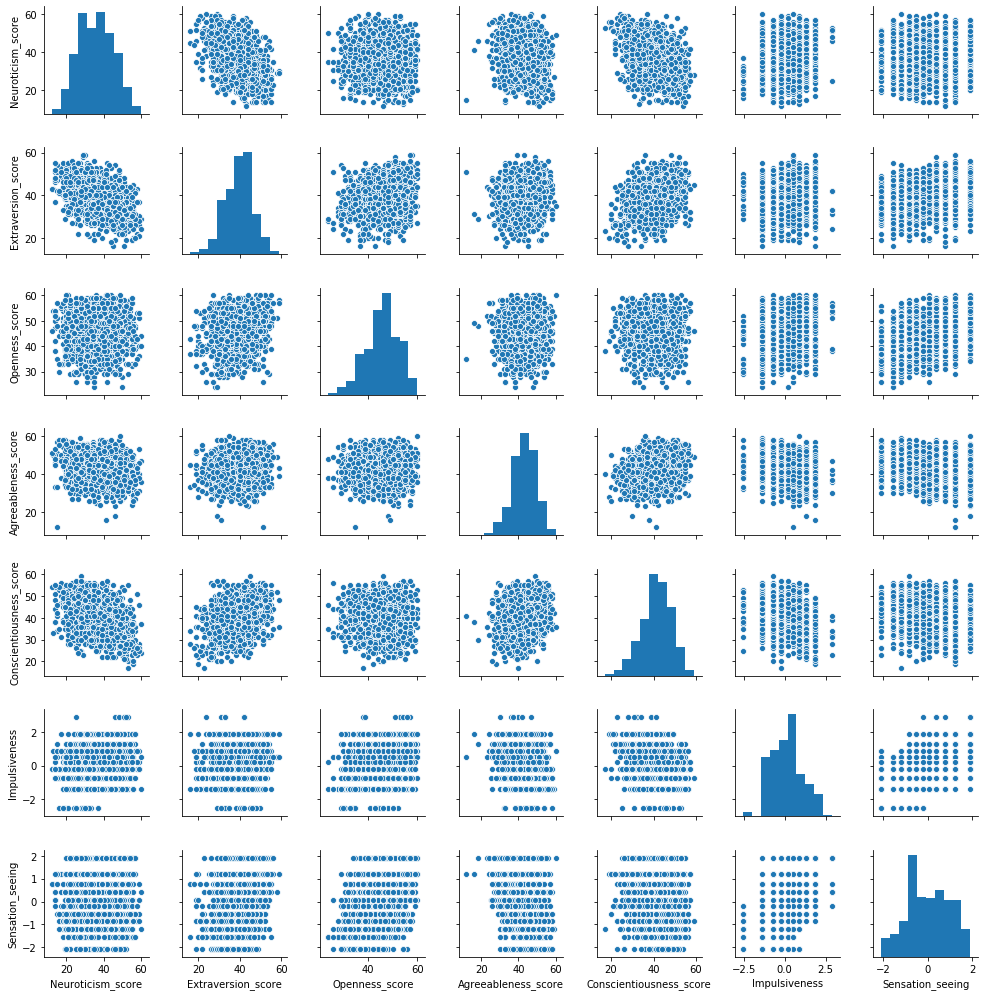

In [4]:
# Check pairplot of continuous variables
sns.pairplot(df.iloc[:, :12], size = 2);

In [5]:
# Check correlation of continuous variables
df.iloc[:, :12].corr() > .75

,Neuroticism_score,Extraversion_score,Openness_score,Agreeableness_score,Conscientiousness_score,Impulsiveness,Sensation_seeing
Neuroticism_score,True,False,False,False,False,False,False
Extraversion_score,False,True,False,False,False,False,False
Openness_score,False,False,True,False,False,False,False
Agreeableness_score,False,False,False,True,False,False,False
Conscientiousness_score,False,False,False,False,True,False,False
Impulsiveness,False,False,False,False,False,True,False
Sensation_seeing,False,False,False,False,False,False,True


### Data Preparation

In [8]:
# Prepare dataframe for analysis
df = data_prep.prep_data(df)
df.head()

,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_Male,Education_level_17,Education_level_18,Education_level_< 16,Education_level_Associates degree,...,Cocaine,Crack,Ecstacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,1,0,1
2,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [9]:
# Create drug dataframe names for next step
df_names = [x + '_df' for x in list(df.columns)[34:]]

In [10]:
# create dictionary with drug and drug specific dataframe
drug_dict = {}
for drug in df_names:
    drug_df = pd.DataFrame(df.iloc[:, :34]).merge(df[[drug[:-3]]], right_index = True, left_index = True)
    drug_dict[drug] = drug_df

### Data Exploration and Visualizations

In [13]:
total_drug_use_dict = {}
for key in drug_dict.keys():
    X, y = helper_functions.get_x_y(drug_dict[key])
    y_pos = y.target.value_counts()[1]
    drug_user_percent = round(y_pos/ len(y), 2)
    total_drug_use_dict[key[:-3]] = drug_user_percent

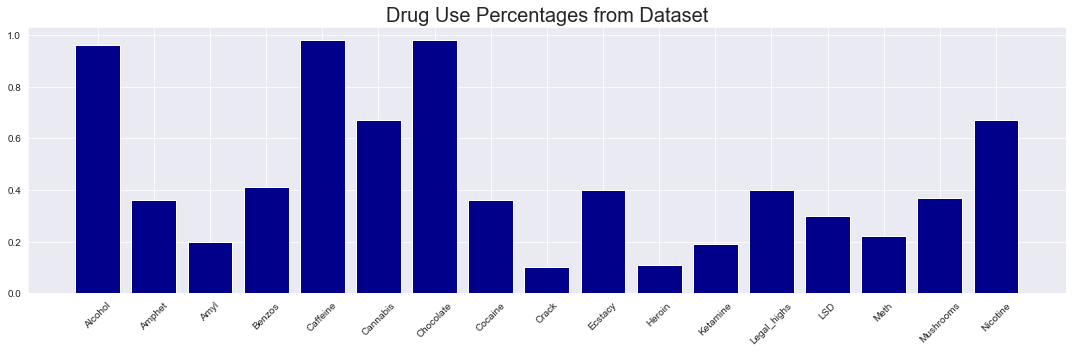

In [14]:
# Barplot of Drug Use Percentages
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,5))
plt.bar(range(len(total_drug_use_dict)), list(total_drug_use_dict.values()), align='center', color = 'darkblue')
plt.xticks(range(len(total_drug_use_dict)), list(total_drug_use_dict.keys()), rotation = 45)
plt.title('Drug Use Percentages from Dataset', fontsize = 20)
plt.tight_layout()
plt.savefig('Data_Visualizations/drug_use_percentage.png')
plt.show()

In [15]:
# Number of participants who claimed to use fake drug
original_df.Semer_fake_drug.value_counts(normalize = True)

0    0.996817
1    0.003183
Name: Semer_fake_drug, dtype: float64

In [16]:
# Male/Female
original_df.Gender.value_counts(normalize = True)

Male      0.500265
Female    0.499735
Name: Gender, dtype: float64

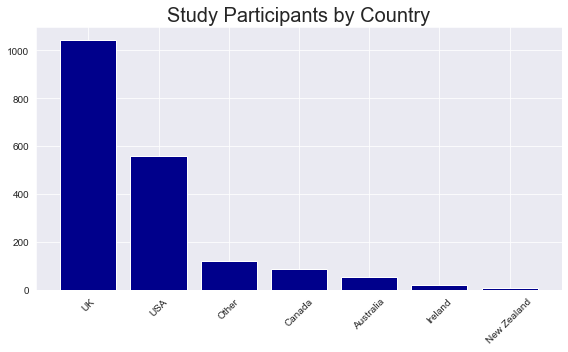

In [17]:
# Country participant totals and plot
country_group_dict = original_df.Country.value_counts().to_dict()

fig = plt.figure(figsize = (8,5))
plt.bar(range(len(country_group_dict)), list(country_group_dict.values()), align='center', color = 'darkblue')
plt.xticks(range(len(country_group_dict)), list(country_group_dict.keys()), rotation = 45)
plt.title('Study Participants by Country', fontsize = 20)
plt.tight_layout()
plt.savefig('Data_Visualizations/country.png')
plt.show()

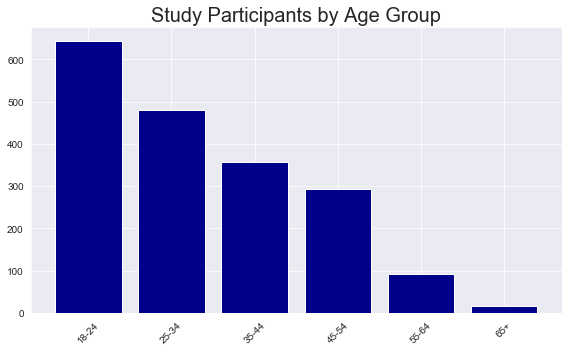

In [18]:
# Age group participant totals and plot
age_group_dict = original_df.Age.value_counts().to_dict()

fig = plt.figure(figsize = (8,5))
plt.bar(range(len(age_group_dict)), list(age_group_dict.values()), align='center', color = 'darkblue')
plt.xticks(range(len(age_group_dict)), list(age_group_dict.keys()), rotation = 45)
plt.title('Study Participants by Age Group', fontsize = 20)
plt.tight_layout()
plt.savefig('Data_Visualizations/age.png')
plt.show()

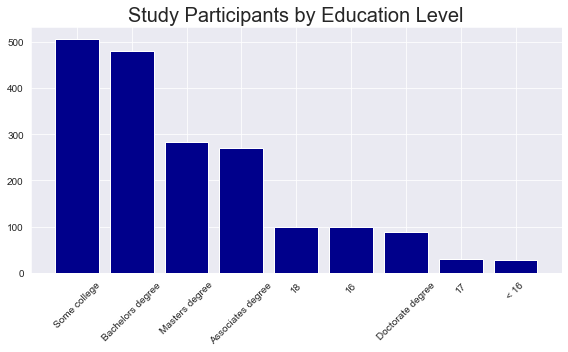

In [19]:
# Education Level participant totals and plot
education_group_dict = original_df.Education_level.value_counts().to_dict()

fig = plt.figure(figsize = (8,5))
plt.bar(range(len(education_group_dict)), list(education_group_dict.values()), align='center', color = 'darkblue')
plt.xticks(range(len(education_group_dict)), list(education_group_dict.keys()), rotation = 45)
plt.title('Study Participants by Education Level', fontsize = 20)
plt.tight_layout()
plt.savefig('Data_Visualizations/education.png')
plt.show()

In [20]:
# Import modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import itertools
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

/Users/bengeissel/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Helper Functions

In [21]:
# function to split dataframe into features and target
def get_x_y(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1:]
    y.columns = ['target']
    return X, y

In [22]:
# function to apply standard scaling post train_test_split
def scaling(X_train, X_test):
    ss = StandardScaler()
    # Fit Transform and replace on X_train
    numeric_train = X_train.iloc[:, 26:33]
    X_train.drop(columns = ['Neuroticism_score', 'Extraversion_score', 'Openness_score', 'Agreeableness_score',
                            'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing'], inplace = True)
    scaled_train = pd.DataFrame(ss.fit_transform(numeric_train))
    scaled_train.columns = numeric_train.columns
    scaled_train.index = numeric_train.index
    X_train = X_train.merge(scaled_train, right_index = True, left_index = True)
    
    # Transform and replace on X_test
    numeric_test = X_test.iloc[:, 26:33]
    X_test.drop(columns = ['Neuroticism_score', 'Extraversion_score', 'Openness_score', 'Agreeableness_score',
                            'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing'], inplace = True)
    scaled_test = pd.DataFrame(ss.transform(numeric_test))
    scaled_test.columns = numeric_test.columns
    scaled_test.index = numeric_test.index
    X_test = X_test.merge(scaled_test, right_index = True, left_index = True)
    
    return X_train, X_test

In [23]:
# Function to apply SMOTE
def smote_train(X_train, y_train):
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
    return X_train_resampled, y_train_resampled

### Grid Search Functions

In [24]:
# Function to grid search for best C and penalty
def grid_search_CP(X_train, y_train):
    penalty = ['l1', 'l2']
    C = np.arange(.1, 50, .5)
    hyperparameters = dict(C = C, penalty = penalty)
    lr = LogisticRegression()
    clf = GridSearchCV(lr, hyperparameters, cv = 5, verbose = 0)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    grid = clf.fit(X_train_res, y_train_res)
    c = grid.best_estimator_.get_params()['C']
    p = grid.best_estimator_.get_params()['penalty']
    return c, p

In [52]:
# Function to grid search for best k value (# of neighbors for knn)
def grid_search_neighbors(X_train, y_train):
    K = list(range(1, 9, 2))
    hyperparameters = dict(n_neighbors = K)
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, hyperparameters, cv = 5, verbose = 0)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    grid = clf.fit(X_train_res, y_train_res)
    k = grid.best_estimator_.get_params()['n_neighbors']
    return k

In [53]:
# Function to grid search for best n value (# of estimators for random forest)
def grid_search_estimators(X_train, y_train):
    N = list(range(70, 125, 5))
    hyperparameters = dict(n_estimators = N)
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, hyperparameters, cv = 5, verbose = 0)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    grid = clf.fit(X_train_res, y_train_res)
    n = grid.best_estimator_.get_params()['n_estimators']
    return n

### Model Fitting Functions

In [78]:
# Function to fit Logistic Regression Model and predict on test set
def run_logreg(X_train, X_test, y_train, y_test, C, penalty):
    # Print test data balances
    y_pos = y_test.target.value_counts()[1]
    drug_user_percent = round(y_pos/ len(y_test), 2)
    print(f'Drug user percent: {drug_user_percent * 100}%')
    print()
    print('Logisitic Regression Results:')
    
    # Fit model and get predictions
    model = LogisticRegression(C = C, penalty = penalty, fit_intercept = False, solver = 'liblinear')
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['Logistic_Regression' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [79]:
# Function to fit Naive Bayes Gaussian Model and predict on test set
def run_NB_Gaussian(X_train, X_test, y_train, y_test):
    print('Naive Bayes - Gaussian Results:')
        
    # Fit model and get predictions
    model = GaussianNB()
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['NB_Gaussian' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [80]:
# Function to fit K-Nearest Neighbors Model and predict on test set
def run_knn(X_train, X_test, y_train, y_test, k):
    print('K-Nearest Neighbors Results:')
    
    # Fit model and get predictions
    model = KNeighborsClassifier(n_neighbors = k)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)

    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['KNN' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [81]:
# Function to fit Decision Tree Model and predict on test set
def run_decision_tree(X_train, X_test, y_train, y_test):
    print('Decision Tree Results:')
    
    # Fit model and get predictions
    model = DecisionTreeClassifier()
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['Decision_Tree' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [82]:
# Function to fit Random Forest Model and predict on test set
def run_random_forest(X_train, X_test, y_train, y_test, n):
    print('Random Forest Results:')
    
    # Fit model and get predictions
    model = RandomForestClassifier(n_estimators = n)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['Random_Forest' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [89]:
# Function to fit Support Vector Machine Model and predict on test set
def run_svc(X_train, X_test, y_train, y_test):
    print('SVC Results:')
    
    # Fit model and get predictions
    model = SVC(probability = True)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)

    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['SVC' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [103]:
# Function to fit Linear Support Vector Machine Model and predict on test set
def run_linear_svc(X_train, X_test, y_train, y_test):
    print('Linear SVC Results:')
    
    # Fit model and get predictions
    model = LinearSVC()
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
#     # Plot ROC Curve
#     fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
#     AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1]
#     print()
#     print(f'AUC: {AUC}')
#     plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
#     plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.title('ROC Curve and AUC')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.tight_layout()
#     plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['Linear_SVC' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score'],
        'Score' : scores})

In [104]:
# Function to fit Stochastic Gradient Descent Model and predict on test set
def run_sgd(X_train, X_test, y_train, y_test):
    print('SGD Results:')
    
    # Fit model and get predictions
    model = SGDClassifier()
    X_train_res, y_train_res = smote_train(X_train, y_train)
    clf = model.fit(X_train_res, y_train_res)
    calibrator = CalibratedClassifierCV(clf, cv='prefit')
    model_fit = calibrator.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, calibrator.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['SGD' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

### Run All Models

In [22]:
# Function to combine all steps and run all the models
def modeling_steps(df):
    # Function to split dataframe into features and target
    X, y = helper_functions.get_x_y(df)
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
    
    # Function to apply standard scaling post train_test_split
    X_train, X_test = helper_functions.scaling(X_train, X_test)
    
    # Function to grid search for best C and penalty
    C, P = grid_search_functions.grid_search_CP(X_train, y_train)
    k = grid_search_functions.grid_search_neighbors(X_train, y_train)
    n = grid_search_functions.grid_search_estimators(X_train, y_train)
    
    # Function to fit Logistic Regression Model and predict on test set
    logreg_df = modeling_functions.run_logreg(X_train, X_test, y_train, y_test, C, P)
    gaussian_df = modeling_functions.run_NB_Gaussian(X_train, X_test, y_train, y_test)
    knn_df = modeling_functions.run_knn(X_train, X_test, y_train, y_test, k)
    decision_tree_df = modeling_functions.run_decision_tree(X_train, X_test, y_train, y_test)
    random_forest_df = modeling_functions.run_random_forest(X_train, X_test, y_train, y_test, n)
    svc_df = modeling_functions.run_svc(X_train, X_test, y_train, y_test)
    linear_svc_df = modeling_functions.run_linear_svc(X_train, X_test, y_train, y_test)
    sgd_df = modeling_functions.run_sgd(X_train, X_test, y_train, y_test)
    
    
    model_dfs = [logreg_df, gaussian_df, knn_df, decision_tree_df,
                 random_forest_df, svc_df, linear_svc_df, sgd_df]
    
    # Combine dataframes
    final_df = pd.concat(model_dfs, join='outer')
    
    return final_df

 Alcohol 
Drug user percent: 97.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9725274725274725
Recall: 0.7763157894736842
Accuracy: 0.7627118644067796
F1_Score: 0.8634146341463413


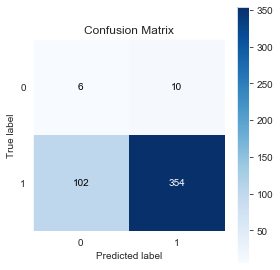


AUC: 0.677220394736842


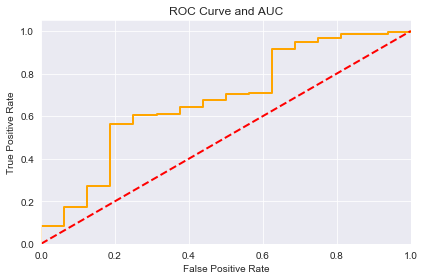

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 1.0
Recall: 0.05263157894736842
Accuracy: 0.0847457627118644
F1_Score: 0.1


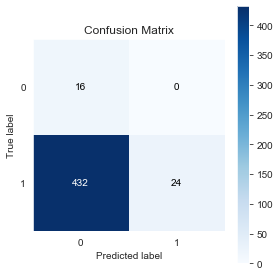


AUC: 0.6891447368421053


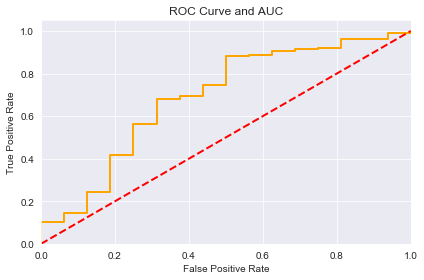

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.969626168224299
Recall: 0.9100877192982456
Accuracy: 0.885593220338983
F1_Score: 0.9389140271493213


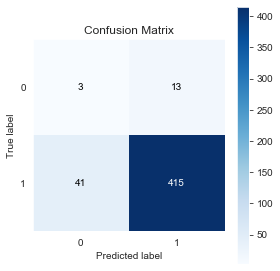


AUC: 0.5487938596491229


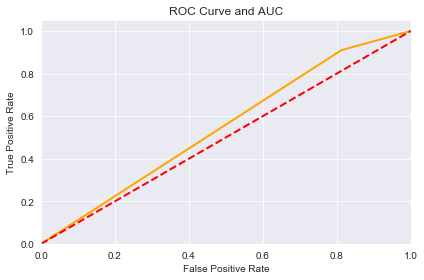

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.9727891156462585
Recall: 0.9407894736842105
Accuracy: 0.9173728813559322
F1_Score: 0.9565217391304347


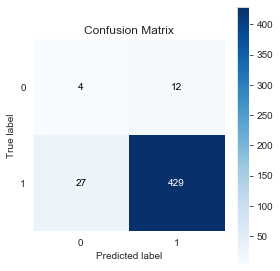


AUC: 0.5953947368421053


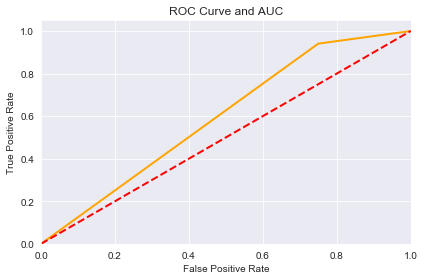

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.9680170575692963
Recall: 0.9956140350877193
Accuracy: 0.9639830508474576
F1_Score: 0.9816216216216216


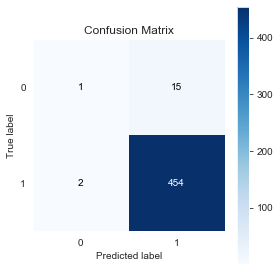


AUC: 0.6012883771929824


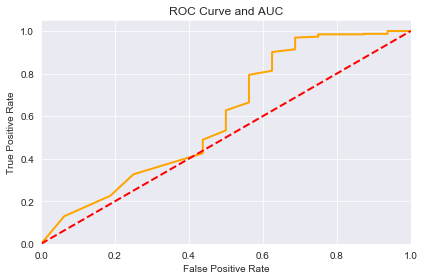

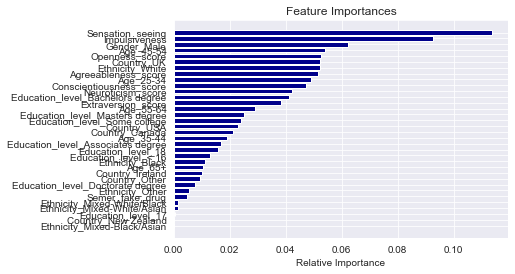

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.9745547073791349
Recall: 0.8399122807017544
Accuracy: 0.8241525423728814
F1_Score: 0.9022379269729094


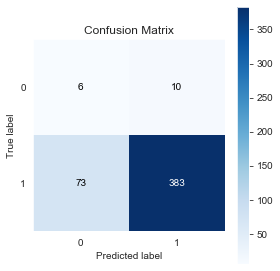


AUC: 0.6439144736842106


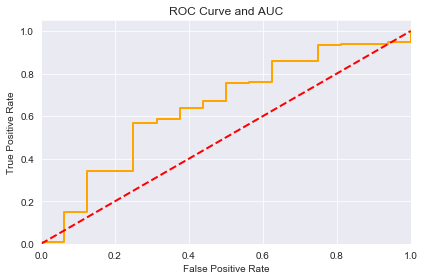

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9726027397260274
Recall: 0.7785087719298246
Accuracy: 0.7648305084745762
F1_Score: 0.8647990255785627


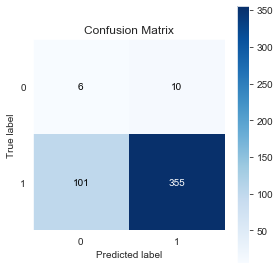

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.9751552795031055
Recall: 0.6885964912280702
Accuracy: 0.6822033898305084
F1_Score: 0.8071979434447301


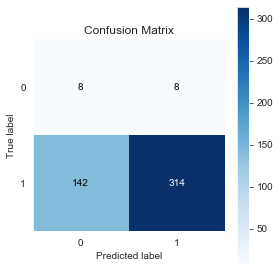


AUC: 0.6484375


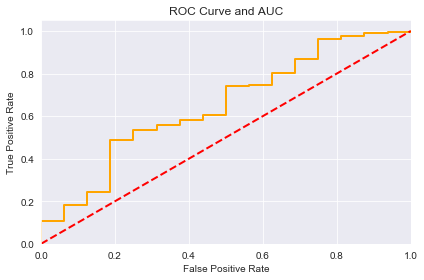

---------------------------------------------------------------------------
 Amphet 
Drug user percent: 33.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.5514018691588785
Recall: 0.7515923566878981
Accuracy: 0.7139830508474576
F1_Score: 0.6361185983827493


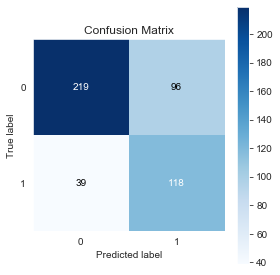


AUC: 0.7824891315337175


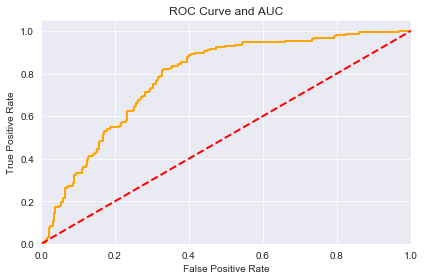

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.3968253968253968
Recall: 0.9554140127388535
Accuracy: 0.5021186440677966
F1_Score: 0.5607476635514018


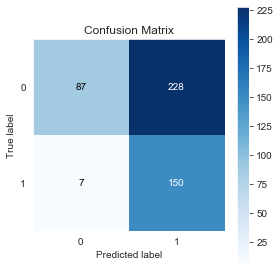


AUC: 0.7460822970377111


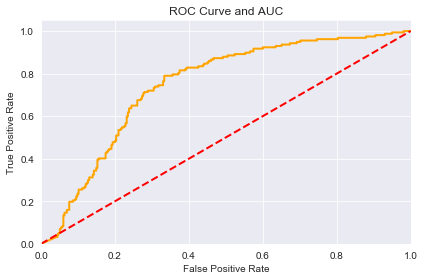

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.4634146341463415
Recall: 0.6050955414012739
Accuracy: 0.635593220338983
F1_Score: 0.5248618784530387


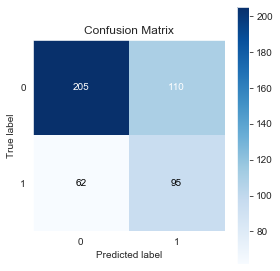


AUC: 0.6279445960974623


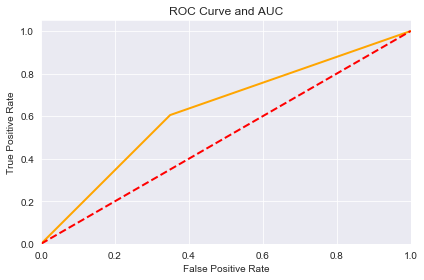

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.4175824175824176
Recall: 0.4840764331210191
Accuracy: 0.6038135593220338
F1_Score: 0.448377581120944


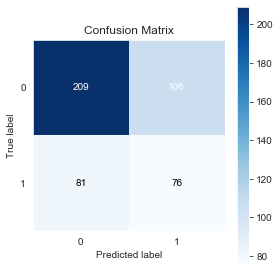


AUC: 0.5737842483065412


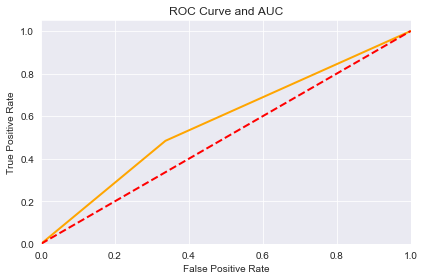

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.553763440860215
Recall: 0.6560509554140127
Accuracy: 0.7097457627118644
F1_Score: 0.6005830903790087


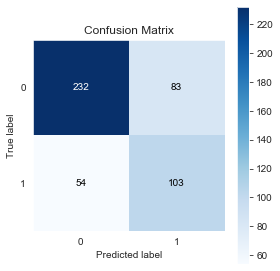


AUC: 0.7543928824183601


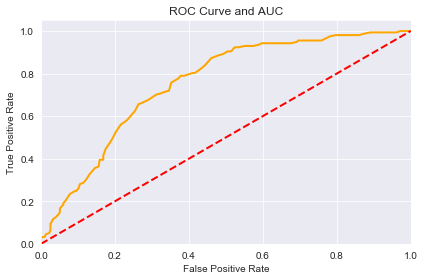

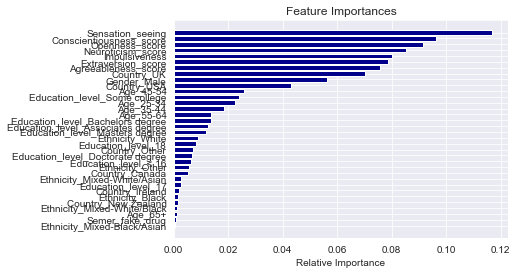

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.508130081300813
Recall: 0.7961783439490446
Accuracy: 0.6758474576271186
F1_Score: 0.620347394540943


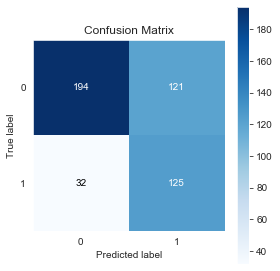


AUC: 0.7734506116671721


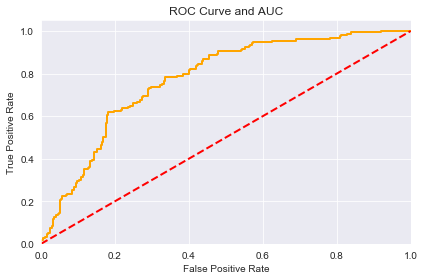

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.5426008968609866
Recall: 0.7707006369426752
Accuracy: 0.7076271186440678
F1_Score: 0.6368421052631579


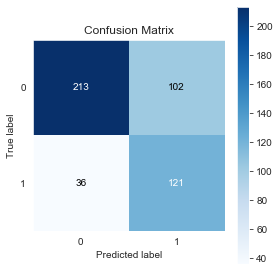

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.46875
Recall: 0.6687898089171974
Accuracy: 0.6377118644067796
F1_Score: 0.5511811023622047


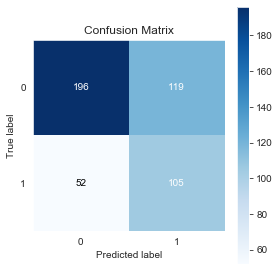


AUC: 0.6901425538368213


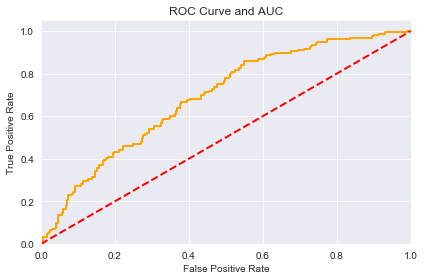

---------------------------------------------------------------------------
 Amyl 


KeyboardInterrupt: 

In [25]:
# Run all models for each drug and create a dataframe for each drug
drug_use_dfs_dict = {}
for key in drug_dict.keys():
    start = "\033[1m"
    end = "\033[0;0m"
    print(start, key[:-3], end)
    final_df = modeling_steps(drug_dict[key])
    drug_use_dfs_dict[key[:-3]] = final_df

In [130]:
# Reset index of each dataframe and combine into one full dataframe
full_df = pd.DataFrame()
for key in drug_use_dfs_dict.keys():
    df = drug_use_dfs_dict[key]
    df['Drug'] = [key for i in range(len(df))]
    full_df = pd.concat([full_df, df], join = 'outer')
full_df.reset_index(drop = True, inplace = True)
full_df.drop('index', axis = 1, inplace = True)
full_df = full_df[['Drug', 'Model', 'Metric', 'Score']]
full_df

,Drug,Model,Metric,Score
0,Alcohol,Logistic_Regression,Precision,0.980716
1,Alcohol,Logistic_Regression,Recall,0.775599
2,Alcohol,Logistic_Regression,Accuracy,0.766949
3,Alcohol,Logistic_Regression,F1_Score,0.866180
4,Alcohol,Logistic_Regression,AUC,0.705212
...,...,...,...,...
658,Nicotine,SGD,Precision,0.776224
659,Nicotine,SGD,Recall,0.730263
660,Nicotine,SGD,Accuracy,0.690678
661,Nicotine,SGD,F1_Score,0.752542


In [131]:
# Output clean final dataframe to csv
full_df.to_csv('Drug_classifier_scores_df.csv')

In [188]:
# Load in data to check and further modify
drug_classifier_scores_df = pd.read_csv('Drug_classifier_scores_df.csv', index_col = 'Unnamed: 0')
drug_classifier_scores_df

,Drug,Model,Metric,Score
0,Alcohol,Logistic_Regression,Precision,0.980716
1,Alcohol,Logistic_Regression,Recall,0.775599
2,Alcohol,Logistic_Regression,Accuracy,0.766949
3,Alcohol,Logistic_Regression,F1_Score,0.866180
4,Alcohol,Logistic_Regression,AUC,0.705212
...,...,...,...,...
658,Nicotine,SGD,Precision,0.776224
659,Nicotine,SGD,Recall,0.730263
660,Nicotine,SGD,Accuracy,0.690678
661,Nicotine,SGD,F1_Score,0.752542


In [208]:
# Pivot dataframe into searchable table
drug_classifier_scores_search_df = drug_classifier_scores_df.pivot_table(values = ['Score'], index = ['Drug'],
                                                                  columns = ['Metric', 'Model'])
drug_classifier_scores_search_df.Score.Accuracy

Model,Decision_Tree,KNN,Linear_SVC,Logistic_Regression,NB_Gaussian,Random_Forest,SGD,SVC
Drug,,,,,,,,
Alcohol,0.932203,0.877119,0.771186,0.766949,0.091102,0.972458,0.703390,0.815678
Amphet,0.650424,0.665254,0.739407,0.747881,0.461864,0.739407,0.665254,0.718220
Amyl,0.667373,0.737288,0.677966,0.684322,0.288136,0.807203,0.728814,0.720339
Benzos,0.618644,0.637712,0.720339,0.713983,0.680085,0.675847,0.680085,0.699153
Caffeine,0.949153,0.900424,0.773305,0.779661,0.241525,0.957627,0.788136,0.858051
Cannabis,0.739407,0.750000,0.779661,0.786017,0.472458,0.800847,0.718220,0.779661
Chocolate,0.947034,0.923729,0.792373,0.802966,0.052966,0.987288,0.764831,0.879237
Cocaine,0.629237,0.620763,0.677966,0.648305,0.508475,0.654661,0.654661,0.661017
Crack,0.819915,0.760593,0.724576,0.728814,0.171610,0.875000,0.713983,0.735169


In [212]:
import itertools
drug_list = list(total_drug_use_dict.keys())
metric_list = ['AUC', 'Accuracy', 'Recall', 'Precision', 'F1_Score']
combo_list = list(itertools.product(drug_list, metric_list))
combo_list

[('Alcohol', 'AUC'),
 ('Alcohol', 'Accuracy'),
 ('Alcohol', 'Recall'),
 ('Alcohol', 'Precision'),
 ('Alcohol', 'F1_Score'),
 ('Amphet', 'AUC'),
 ('Amphet', 'Accuracy'),
 ('Amphet', 'Recall'),
 ('Amphet', 'Precision'),
 ('Amphet', 'F1_Score'),
 ('Amyl', 'AUC'),
 ('Amyl', 'Accuracy'),
 ('Amyl', 'Recall'),
 ('Amyl', 'Precision'),
 ('Amyl', 'F1_Score'),
 ('Benzos', 'AUC'),
 ('Benzos', 'Accuracy'),
 ('Benzos', 'Recall'),
 ('Benzos', 'Precision'),
 ('Benzos', 'F1_Score'),
 ('Caffeine', 'AUC'),
 ('Caffeine', 'Accuracy'),
 ('Caffeine', 'Recall'),
 ('Caffeine', 'Precision'),
 ('Caffeine', 'F1_Score'),
 ('Cannabis', 'AUC'),
 ('Cannabis', 'Accuracy'),
 ('Cannabis', 'Recall'),
 ('Cannabis', 'Precision'),
 ('Cannabis', 'F1_Score'),
 ('Chocolate', 'AUC'),
 ('Chocolate', 'Accuracy'),
 ('Chocolate', 'Recall'),
 ('Chocolate', 'Precision'),
 ('Chocolate', 'F1_Score'),
 ('Cocaine', 'AUC'),
 ('Cocaine', 'Accuracy'),
 ('Cocaine', 'Recall'),
 ('Cocaine', 'Precision'),
 ('Cocaine', 'F1_Score'),
 ('Crack', 'A

In [223]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

max_drug_metric_model_dict = {}
for combo in combo_list:
    q = f"""SELECT Model, Score FROM drug_classifier_scores_df
            WHERE Drug = {"'" + combo[0] + "'"} AND Metric = {"'" + combo[1] + "'"}
            ORDER BY Score DESC
            LIMIT 1"""
    result = pysqldf(q)
    max_drug_metric_model_dict[combo] = (result.iloc[0]['Model'], round(result.iloc[0]['Score'] * 100 ,2))
max_drug_metric_model_dict

{('Alcohol', 'AUC'): ('Logistic_Regression', 70.52),
 ('Alcohol', 'Accuracy'): ('Random_Forest', 97.25),
 ('Alcohol', 'Recall'): ('Random_Forest', 100.0),
 ('Alcohol', 'Precision'): ('NB_Gaussian', 100.0),
 ('Alcohol', 'F1_Score'): ('Random_Forest', 98.6),
 ('Amphet', 'AUC'): ('Logistic_Regression', 80.2),
 ('Amphet', 'Accuracy'): ('Logistic_Regression', 74.79),
 ('Amphet', 'Recall'): ('NB_Gaussian', 93.92),
 ('Amphet', 'Precision'): ('Random_Forest', 67.06),
 ('Amphet', 'F1_Score'): ('Logistic_Regression', 68.6),
 ('Amyl', 'AUC'): ('SGD', 73.74),
 ('Amyl', 'Accuracy'): ('Random_Forest', 80.72),
 ('Amyl', 'Recall'): ('NB_Gaussian', 92.77),
 ('Amyl', 'Precision'): ('Random_Forest', 40.48),
 ('Amyl', 'F1_Score'): ('SGD', 46.22),
 ('Benzos', 'AUC'): ('SVC', 76.89),
 ('Benzos', 'Accuracy'): ('Linear_SVC', 72.03),
 ('Benzos', 'Recall'): ('SVC', 70.11),
 ('Benzos', 'Precision'): ('Linear_SVC', 63.4),
 ('Benzos', 'F1_Score'): ('Logistic_Regression', 65.12),
 ('Caffeine', 'AUC'): ('Random_Fore